In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [5]:
#Read Zip file:
df = pd.read_csv("fifa_23_male.zip", compression = "zip",index_col=False)
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [6]:
#Check all columns of dataframe:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [7]:
#Dropping colimns:

df = df.drop(['Known As','Image Link','Club Jersey Number','On Loan','National Team Image Link','National Team Position','National Team Jersey Number'], axis = 1)

In [8]:
#Check for null values and dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Full Name                 18539 non-null  object
 1   Overall                   18539 non-null  int64 
 2   Potential                 18539 non-null  int64 
 3   Value(in Euro)            18539 non-null  int64 
 4   Positions Played          18539 non-null  object
 5   Best Position             18539 non-null  object
 6   Nationality               18539 non-null  object
 7   Age                       18539 non-null  int64 
 8   Height(in cm)             18539 non-null  int64 
 9   Weight(in kg)             18539 non-null  int64 
 10  TotalStats                18539 non-null  int64 
 11  BaseStats                 18539 non-null  int64 
 12  Club Name                 18539 non-null  object
 13  Wage(in Euro)             18539 non-null  int64 
 14  Release Clause        

In [9]:
#Preparing for mapping position for unifying and reducing categories of this column:

map_position = {
     'GK': 'Goalkeeper',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'CDM': 'Midfielder',
    'CM': 'Midfielder',
    'CAM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'RW': 'Forward',
    'LW': 'Forward',
    'CF': 'Forward',
    'ST': 'Forward',
    'RF': 'Forward',
    'LF': 'Forward',
    'SUB':'Substitute',
    'RES':'Reserve',
    'RWB':'Defender',
    'LWB':'Defender'

}

In [10]:
df["Club Position"].unique()

array(['RW', 'CF', 'ST', 'CM', 'GK', 'SUB', 'CB', 'LW', 'CDM', 'LB',
       'CAM', 'RB', 'RF', 'RES', 'RM', 'LM', 'RWB', 'LWB', 'LF', '-'],
      dtype=object)

In [11]:
df["Best Position"].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [12]:
df["Best Position"].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [13]:
#Apply mapping for postion:
df["Position"] = df["Club Position"].map(map_position)

In [14]:
#apply maping for column "Best position":

df["Best Position_maped"] = df["Best Position"].map(map_position)

In [15]:
#Check that all positions maped:
df["Position"].unique()

array(['Forward', 'Midfielder', 'Goalkeeper', 'Substitute', 'Defender',
       'Reserve', nan], dtype=object)

In [16]:
#Seeems that these players are not related to any club and might be considered:
free_agent_df = df[df["Position"].isna()]

display(free_agent_df)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
438,Tomáš Vaclík,80,80,0,GK,GK,Czech Republic,33,188,85,...,33,30,35,30,30,33,30,80,NaN,Goalkeeper
447,Guillermo Ochoa,80,80,0,GK,GK,Mexico,36,185,78,...,32,30,32,30,30,30,30,80,NaN,Goalkeeper
548,Alfredo Talavera,79,79,0,GK,GK,Mexico,39,186,85,...,33,32,35,32,32,34,32,79,NaN,Goalkeeper
831,Dejan Lovren,78,78,0,CB,CB,Croatia,32,188,84,...,60,72,76,72,74,78,74,20,NaN,Defender
865,Milan Borjan,77,77,0,GK,GK,Canada,34,196,84,...,36,33,39,33,33,37,33,77,NaN,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15193,Ahmed Suhail,60,68,0,"CB,RWB",CB,Qatar,23,182,73,...,51,59,58,59,60,62,60,16,NaN,Defender
16404,David Djamas,58,74,0,"LB,LM",LB,Cyprus,18,182,73,...,52,57,48,57,58,53,58,15,NaN,Defender
16424,Stefanos Kittos,58,68,0,GK,GK,Cyprus,20,186,75,...,22,21,23,21,20,22,20,59,NaN,Goalkeeper
17308,Stavros Georgiou,55,70,0,"ST,CF",ST,Cyprus,17,183,77,...,55,49,48,49,49,49,49,18,NaN,Forward


In [17]:
free_agent_df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,92.000000,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.0,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,69.173913,71.728261,0.0,27.521739,181.804348,74.836957,1609.641304,374.728261,0.0,0.0,...,57.173913,56.239130,57.173913,55.260870,54.989130,55.260870,54.750000,53.434783,54.750000,28.902174
std,5.681295,4.985921,0.0,4.149615,6.709415,7.285809,295.355981,35.316187,0.0,0.0,...,16.165768,15.322446,16.165768,16.376658,16.224723,16.376658,16.691529,16.945487,16.691529,21.522316
min,52.000000,55.000000,0.0,17.000000,168.000000,59.000000,891.000000,289.000000,0.0,0.0,...,22.000000,22.000000,22.000000,21.000000,22.000000,21.000000,20.000000,22.000000,20.000000,15.000000
25%,65.000000,68.000000,0.0,25.000000,177.000000,71.000000,1459.500000,348.250000,0.0,0.0,...,50.500000,51.750000,50.500000,47.500000,45.000000,47.500000,45.750000,41.000000,45.750000,17.000000
50%,69.000000,71.500000,0.0,27.000000,182.000000,75.000000,1678.500000,378.500000,0.0,0.0,...,62.000000,60.000000,62.000000,60.500000,60.000000,60.500000,60.500000,60.500000,60.500000,19.000000
75%,73.250000,75.000000,0.0,31.000000,186.000000,78.250000,1823.750000,396.000000,0.0,0.0,...,68.250000,67.000000,68.250000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,20.250000
max,80.000000,83.000000,0.0,39.000000,196.000000,95.000000,2053.000000,446.000000,0.0,0.0,...,79.000000,77.000000,79.000000,76.000000,78.000000,76.000000,77.000000,79.000000,77.000000,80.000000


In [18]:
#Create df just with players of 'Real Madrid CF' for "country" column manipulation:
club_df = df[df['Club Name'] =='Real Madrid CF']

In [19]:
# Apply it for displaying all columns:
pd.set_option("display.max_columns", None)

In [20]:
#Check for unique values of countries, which we want to make numbers:
nationalities = df["Nationality"].tolist()

In [21]:
club_df=pd.DataFrame({'Nationality':nationalities})
codes,uniques=pd.factorize(df.Nationality)
codes

#Obviously, to convert to column

club_df['national_encoded']=pd.Series(codes)
club_df

,Nationality,national_encoded
0,Argentina,0
1,France,1
2,Poland,2
3,Belgium,3
4,France,1
...,...,...
18534,Republic of Ireland,74
18535,China PR,98
18536,Northern Ireland,60
18537,Republic of Ireland,74


In [24]:
#Creating df for working just with playesr of Real Madrid:
madrid_club_df = df[df['Club Name'] =='Real Madrid CF']

display(madrid_club_df)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,Right,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,2018,Left,3,1,4,Belgium,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90,Goalkeeper,Goalkeeper
28,Toni Kroos,88,88,72000000,CM,CM,Germany,32,183,76,2147,444,Real Madrid CF,310000,147600000,CM,2023,2014,Right,5,3,4,-,Medium,Medium,53,81,90,81,71,68,88,77,58,93,82,80,86,84,93,88,55,52,63,90,71,89,32,75,72,86,60,80,76,89,73,88,71,73,60,10,11,13,7,10,80,80,81,81,81,80,86,84,88,84,80,84,80,77,74,77,22,Midfielder,Midfielder
29,Luka Modrić,88,88,29000000,CM,CM,Croatia,36,172,66,2257,464,Real Madrid CF,230000,59500000,CM,2023,2012,Right,4,4,4,Croatia,Medium,Medium,73,76,89,88,72,66,86,72,55,91,76,85,85,78,92,90,76,70,91,88,92,79,67,83,58,82,62,80,78,90,82,92,70,75,72,13,9,7,14,9,79,83,82,82,82,83,88,87,88,87,84,84,84,82,75,82,22,Midfielder,Midfielder
30,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,29,190,85,2011,444,Real Madrid CF,250000,156200000,CB,2026,2022,Right,3,2,2,Germany,High,High,82,53,71,67,86,85,68,40,82,80,34,64,50,56,78,72,72,91,56,85,50,77,84,71,90,67,92,84,49,61,40,78,88,87,84,14,15,10,12,8,69,67,67,67,67,67,69,71,74,71,81,83,81,83,88,83,22,Defender,Defender
46,David Alaba,86,86,55500000,CB,CB,Austria,30,180,78,2277,475,Real Madrid CF,220000,113800000,CB,2026,2021,Left,4,3,4,Austria,Medium,Medium,79,71,83,80,85,77,83,63,77,89,67,77,77,85,80,85,79,79,76,88,78,82,81,74,78,78,78,87,73,78,79,85,89,84,83,5,7,14,15,9,80,79,79,79,79,79,83,83,85,83,86,86,86,86,86,86,21,Defender,Defender
63,Vinícius José de Oliveira Júnior,86,92,109000000,LW,LW,Brazil,21,176,73,1985,434,Real Madrid CF,200000,245300000,LW,2025,2018,Right,4,5,2,-,High,Medium,95,79,74,90,29,67,72,84,50,75,72,92,77,62,73,89,95,95,94,82,83,76,75,84,62,76,58,26,82,75,65,79,32,25,18,5,7,7,7,10,81,85,84,84,84,85,85,86,77,86,63,58,63,58,47,58,17,Forward,Forward
104,Daniel Carvajal Ramos,84,84,36500000,RB,RB,Spain,30,173,73,2105,450,Real Madrid CF,185000,74800000,RB,2025,2013,Right,3,3,3,Spain,High,Medium,82,54,77,80,78,79,82,51,70,82,49,78,76,47,74,83,80,84,78,79,82,68,77,85,74,47,85,78,75,72,45,80,76,81,82,13,13,15,9,15,73,75,74,74,74,75,78,81,80,81,84,82,84,84,81,84,23,Defender,Defender
119,Eden Hazard,84,84,35000000,LW,LW,Belgium,31,175,74,2045,430,Real Madrid CF,220000,71800000,SUB,2024,2019,Right,4,4,4,Belgium,Medium,Medium,83,80,82,87,35,63,77,78,61,85,82,89,83,79,81,87,84,82,85,77,89,82,55,74,61,77,54,41,83,84,87,88,34,27,22,11,12,6,8,8,82,83,83,83,83,83,84,84,81,84

Discover on REAL MADRID club:

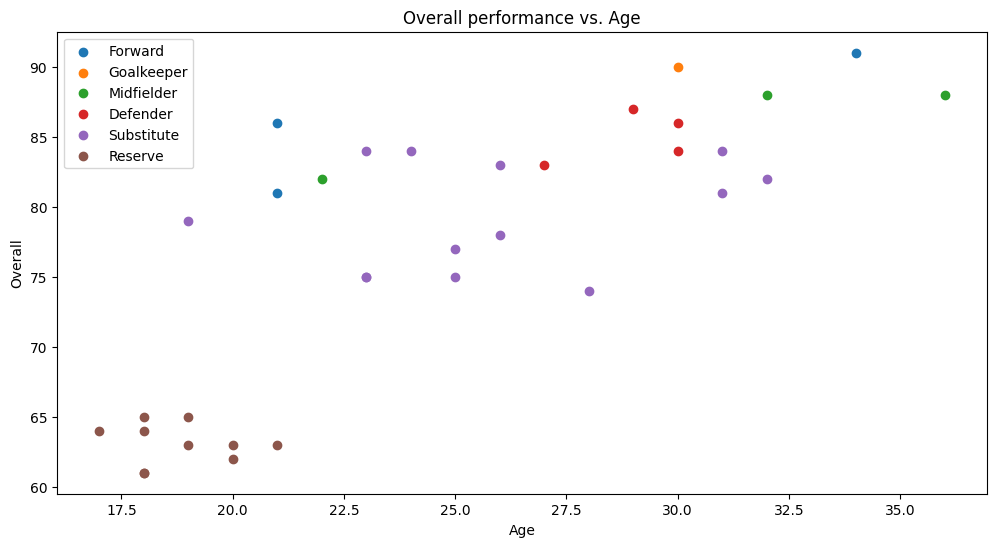

In [266]:

plt.figure(figsize=(12, 6))

# Scatter plot with legend
for position in madrid_club_df["Position"].unique():
    plt.scatter(madrid_club_df[madrid_club_df["Position"] == position]['Age'],
                madrid_club_df[madrid_club_df["Position"] == position]['Overall'],
                label=position)

plt.xlabel('Age')
plt.ylabel('Overall')
plt.title('Overall performance vs. Age')
plt.legend()
plt.show()

In [156]:
#Merging two dfs:

# Create a dictionary mapping nationalities to their encoded values
nationality_encoding = dict(zip(club_df['Nationality'], club_df['national_encoded']))

# Map the encoded values to the 'Nationality' column in df
df['nationality_encoded'] = df['Nationality'].map(nationality_encoding)


df

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,2021,Left,4,4,5,Argentina,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,Forward,Midfielder,0
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,Right,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward,1
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,2022,Right,4,4,5,Poland,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,Forward,Forward,2
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,2015,Right,5,4,4,Belgium,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,Midfielder,Midfielder,3
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,2018,Right,4,5,4,France,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,Forward,Forward,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,2018,Right,3,2,1,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40,15,Reserve,Midfielder,74
18535,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,1289,267,Guangzhou FC,500,158000,SUB,2023,2021,Right,3,2,1,-,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6,44,43,43,43,43,43,45,45,45,45,47,48,47,49,49,49,15,Substitute,Midfielder,98
18536,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,1333,277,Derry City,500,332000,SUB,2023,2022,Right,3,2,1,-,High,Medium,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,

In [265]:
madrid_club_df

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded,Attacking_Work_Rate_num,Defensive_Work_Rate_num
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,1,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward,1,2,2
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,2018,2,3,1,4,Belgium,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90,Goalkeeper,Goalkeeper,3,2,2
28,Toni Kroos,88,88,72000000,CM,CM,Germany,32,183,76,2147,444,Real Madrid CF,310000,147600000,CM,2023,2014,1,5,3,4,-,Medium,Medium,53,81,90,81,71,68,88,77,58,93,82,80,86,84,93,88,55,52,63,90,71,89,32,75,72,86,60,80,76,89,73,88,71,73,60,10,11,13,7,10,80,80,81,81,81,80,86,84,88,84,80,84,80,77,74,77,22,Midfielder,Midfielder,5,2,2
29,Luka Modrić,88,88,29000000,CM,CM,Croatia,36,172,66,2257,464,Real Madrid CF,230000,59500000,CM,2023,2012,1,4,4,4,Croatia,Medium,Medium,73,76,89,88,72,66,86,72,55,91,76,85,85,78,92,90,76,70,91,88,92,79,67,83,58,82,62,80,78,90,82,92,70,75,72,13,9,7,14,9,79,83,82,82,82,83,88,87,88,87,84,84,84,82,75,82,22,Midfielder,Midfielder,16,2,2
30,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,29,190,85,2011,444,Real Madrid CF,250000,156200000,CB,2026,2022,1,3,2,2,Germany,High,High,82,53,71,67,86,85,68,40,82,80,34,64,50,56,78,72,72,91,56,85,50,77,84,71,90,67,92,84,49,61,40,78,88,87,84,14,15,10,12,8,69,67,67,67,67,67,69,71,74,71,81,83,81,83,88,83,22,Defender,Defender,5,3,3
46,David Alaba,86,86,55500000,CB,CB,Austria,30,180,78,2277,475,Real Madrid CF,220000,113800000,CB,2026,2021,2,4,3,4,Austria,Medium,Medium,79,71,83,80,85,77,83,63,77,89,67,77,77,85,80,85,79,79,76,88,78,82,81,74,78,78,78,87,73,78,79,85,89,84,83,5,7,14,15,9,80,79,79,79,79,79,83,83,85,83,86,86,86,86,86,86,21,Defender,Defender,19,2,2
63,Vinícius José de Oliveira Júnior,86,92,109000000,LW,LW,Brazil,21,176,73,1985,434,Real Madrid CF,200000,245300000,LW,2025,2018,1,4,5,2,-,High,Medium,95,79,74,90,29,67,72,84,50,75,72,92,77,62,73,89,95,95,94,82,83,76,75,84,62,76,58,26,82,75,65,79,32,25,18,5,7,7,7,10,81,85,84,84,84,85,85,86,77,86,63,58,63,58,47,58,17,Forward,Forward,9,3,2
104,Daniel Carvajal Ramos,84,84,36500000,RB,RB,Spain,30,173,73,2105,450,Real Madrid CF,185000,74800000,RB,2025,2013,1,3,3,3,Spain,High,Medium,82,54,77,80,78,79,82,51,70,82,49,78,76,47,74,83,80,84,78,79,82,68,77,85,74,47,85,78,75,72,45,80,76,81,82,13,13,15,9,15,73,75,74,74,74,75,78,81,80,81,84,82,84,84,81,84,23,Defender,Defender,17,3,2
119,Eden Hazard,84,84,35000000,LW,LW,Belgium,31,175,74,2045,430,Real Madrid CF,220000,71800000,SUB,2024,2019,1,4,4,4,Belgium,Medium,Medium,83,80,82,87,35,63,77,78,61,85,82,89,83,79,81,87,84,82,85,77,8

In [158]:
#Define a function which transform categorical data into numerical:
def transform_numeric(row):
    if row == "High":
        return 3
    elif row == "Medium":
        return 2
    else: 
        return 1

In [159]:
df['Attacking Work Rate'].value_counts()

Attacking Work Rate
Medium    12204
High       5462
Low         873
Name: count, dtype: int64

In [160]:
df["Attacking_Work_Rate_num"] = df['Attacking Work Rate'].apply(transform_numeric)

In [161]:
df["Defensive_Work_Rate_num"] = df['Defensive Work Rate'].apply(transform_numeric)

In [162]:
madrid_club = madrid_club_df.drop(["Nationality",'Defensive Work Rate','Attacking Work Rate','National Team Name','Club Position'], axis = 1)

madrid_club_df.head()

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,Right,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,2018,Left,3,1,4,Belgium,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90,Goalkeeper,Goalkeeper
28,Toni Kroos,88,88,72000000,CM,CM,Germany,32,183,76,2147,444,Real Madrid CF,310000,147600000,CM,2023,2014,Right,5,3,4,-,Medium,Medium,53,81,90,81,71,68,88,77,58,93,82,80,86,84,93,88,55,52,63,90,71,89,32,75,72,86,60,80,76,89,73,88,71,73,60,10,11,13,7,10,80,80,81,81,81,80,86,84,88,84,80,84,80,77,74,77,22,Midfielder,Midfielder
29,Luka Modrić,88,88,29000000,CM,CM,Croatia,36,172,66,2257,464,Real Madrid CF,230000,59500000,CM,2023,2012,Right,4,4,4,Croatia,Medium,Medium,73,76,89,88,72,66,86,72,55,91,76,85,85,78,92,90,76,70,91,88,92,79,67,83,58,82,62,80,78,90,82,92,70,75,72,13,9,7,14,9,79,83,82,82,82,83,88,87,88,87,84,84,84,82,75,82,22,Midfielder,Midfielder
30,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,29,190,85,2011,444,Real Madrid CF,250000,156200000,CB,2026,2022,Right,3,2,2,Germany,High,High,82,53,71,67,86,85,68,40,82,80,34,64,50,56,78,72,72,91,56,85,50,77,84,71,90,67,92,84,49,61,40,78,88,87,84,14,15,10,12,8,69,67,67,67,67,67,69,71,74,71,81,83,81,83,88,83,22,Defender,Defender


In [163]:
#Define a function which transforms Right/Left into a numerical values:

def transform_numeric_feet(row):
    if row == "Right":
        return 1
    if row == "Left":
        return 2
    else:
        return 0 
   

In [164]:
df['Preferred Foot']= df['Preferred Foot'].apply(transform_numeric_feet)

In [165]:
#Check:
madrid_club_df.loc[:2]

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,Right,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward


In [166]:
#Check for unique values:
madrid_club_df["Position"].value_counts()

Position
Substitute    13
Reserve       10
Defender       4
Forward        3
Midfielder     3
Goalkeeper     1
Name: count, dtype: int64

In [167]:
madrid_club_df.columns

Index(['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Joined On', 'Preferred Foot', 'Weak Foot Rating',
       'Skill Moves', 'International Reputation', 'National Team Name',
       'Attacking Work Rate', 'Defensive Work Rate', 'Pace Total',
       'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Stand

Grouping of features:

Goal keeper:
Goalkeeper Diving', 'Goalkeeper Handling',' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes' , 'Jumping'

Defender:
'Defensive Work Rate', 'Defending Total', 'Standing Tackle', 'Sliding Tackle','Interceptions', 'Positioning', 'LongPassing'

Midfielder:
'Short Passing', 'Dribbling', 'Interceptions', 'Positioning', 

Forward:
'Sprint Speed', 'Shot Power', 'Shooting Total' , 'Attacking Work Rate','Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration'

Common:
'Vision', 'Preferred Foot', 'Stamina','Reactions', 'Agility', 'BallControl', 'Skill Moves', 'International Reputation','Pace Total', 'Passing Total', 'Dribbling Total', 'Physicality Total', 'Crossing',
'Curve', 'Freekick Accuracy','LongPassing','Balance', ,'Strength', 'Long Shots', 'Aggression','Penalties'

PART DEFENDERS:

In [168]:
#Creating df for radar chart:
defender_df= madrid_club_df[madrid_club_df["Position"] == 'Defender']
defender_df    

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
30,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,29,190,85,2011,444,Real Madrid CF,250000,156200000,CB,2026,2022,Right,3,2,2,Germany,High,High,82,53,71,67,86,85,68,40,82,80,34,64,50,56,78,72,72,91,56,85,50,77,84,71,90,67,92,84,49,61,40,78,88,87,84,14,15,10,12,8,69,67,67,67,67,67,69,71,74,71,81,83,81,83,88,83,22,Defender,Defender
46,David Alaba,86,86,55500000,CB,CB,Austria,30,180,78,2277,475,Real Madrid CF,220000,113800000,CB,2026,2021,Left,4,3,4,Austria,Medium,Medium,79,71,83,80,85,77,83,63,77,89,67,77,77,85,80,85,79,79,76,88,78,82,81,74,78,78,78,87,73,78,79,85,89,84,83,5,7,14,15,9,80,79,79,79,79,79,83,83,85,83,86,86,86,86,86,86,21,Defender,Defender
104,Daniel Carvajal Ramos,84,84,36500000,RB,RB,Spain,30,173,73,2105,450,Real Madrid CF,185000,74800000,RB,2025,2013,Right,3,3,3,Spain,High,Medium,82,54,77,80,78,79,82,51,70,82,49,78,76,47,74,83,80,84,78,79,82,68,77,85,74,47,85,78,75,72,45,80,76,81,82,13,13,15,9,15,73,75,74,74,74,75,78,81,80,81,84,82,84,84,81,84,23,Defender,Defender
162,Ferland Mendy,83,84,38000000,LB,LB,France,27,180,73,2158,473,Real Madrid CF,170000,80800000,LB,2025,2019,Left,5,4,1,-,High,High,92,64,77,78,78,84,78,63,72,82,50,77,72,45,79,76,91,92,81,82,79,69,79,90,83,64,82,79,80,75,49,78,77,81,80,7,16,9,10,9,77,78,77,77,77,78,80,82,81,82,84,82,84,83,82,83,20,Defender,Defender


In [169]:
#Check mean and median , what is best to use, whether there is significant difference between them:
mean_df = defender_df[['Defensive Work Rate', 'Defending Total', 'Standing Tackle', 'Sliding Tackle','Interceptions', 'Positioning', 'LongPassing']].describe()
mean_df

,Defending Total,Standing Tackle,Sliding Tackle,Interceptions,Positioning,LongPassing
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
mean,81.750000,83.250000,82.250000,82.000000,69.25000,77.750000
std,4.349329,2.872281,1.707825,4.242641,13.81726,2.629956
min,78.000000,81.000000,80.000000,78.000000,49.00000,74.000000
25%,78.000000,81.000000,81.500000,78.750000,67.00000,77.000000
50%,81.500000,82.500000,82.500000,81.500000,74.00000,78.500000
75%,85.250000,84.750000,83.250000,84.750000,76.25000,79.250000
max,86.000000,87.000000,84.000000,87.000000,80.00000,80.000000


In [170]:
#Creating an array for radar plot:
mean_values = mean_df.iloc[1:2].values
mean_values[0]

array([81.75, 83.25, 82.25, 82.  , 69.25, 77.75])

In [171]:
def_features = madrid_club_df[[ 'Defending Total', 'Standing Tackle', 'Sliding Tackle','Interceptions', 'Positioning', 'LongPassing']].columns

In [172]:
#Creating an array for defenders:
player_values = defender_df[['Full Name','Defending Total', 'Standing Tackle', 'Sliding Tackle','Interceptions', 'Positioning', 'LongPassing']].values
print(player_values)

[['Antonio Rüdiger' 86 87 84 84 49 78]
 ['David Alaba' 85 84 83 87 73 80]
 ['Daniel Carvajal Ramos' 78 81 82 78 75 74]
 ['Ferland Mendy' 78 81 80 79 80 79]]


In [173]:
#Index check;
player_values[0:1]

array([['Antonio Rüdiger', 86, 87, 84, 84, 49, 78]], dtype=object)

In [174]:
#Create variable with categories:
categories=['Defending Total', 'Standing Tackle', 'Sliding Tackle', 'Interceptions',
'Positioning', 'LongPassing']

In [176]:
#Plotting a radar with multiple players:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=player_values[0, 1:],
      theta=categories,
      fill='toself',
      name=player_values[0, 0]
))
fig.add_trace(go.Scatterpolar(
      r=player_values[1, 1:],
      theta=categories,
      fill='toself',
      name=player_values[1, 0]
))
fig.add_trace(go.Scatterpolar(
      r=player_values[2, 1:],
      theta=categories,
      fill='toself',
      name=player_values[2, 0]
))

fig.add_trace(go.Scatterpolar(
      r=player_values[3, 1:],
      theta=categories,
      fill='toself',
      name=player_values[3, 0]
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[40, 90] #We can play with range for changing visibility
    )),
  showlegend=True,
  title = 'Defender',
  height=800,
  width=800,
)

fig.show()

In [268]:
#Let's find defender with lowest score of defender characteristics:

defender_df["sum_def_feat"] =defender_df[['Full Name','Defending Total', 'Standing Tackle', 'Sliding Tackle','Interceptions', 'Positioning', 'LongPassing']].apply(lambda row: row['Defending Total'] + row['Standing Tackle'] +row['Sliding Tackle'] + row['Positioning']+ row['LongPassing'], axis=1)

defender_df[["Full Name","Age","Overall","Potential", "sum_def_feat"]]

C:\Users\Yuliya Lavrenyuk\AppData\Local\Temp\ipykernel_10572\4065360613.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Full Name,Age,sum_def_feat
30,Antonio Rüdiger,29,384
46,David Alaba,30,405
104,Daniel Carvajal Ramos,30,390
162,Ferland Mendy,27,398


In [26]:
#Creating DF only with defenders based on all defenders:
def_df_all = df[df['Position'] == "Defender"]
def_df_all

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
9,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,30,193,92,2117,461,Liverpool,230000,181300000,CB,2025,2018,Right,3,2,4,Netherlands,Medium,High,81,60,71,72,91,86,53,52,87,79,45,70,60,70,86,76,68,91,61,89,53,81,88,74,93,64,85,90,47,65,62,90,92,92,86,13,10,13,11,11,74,68,70,70,70,68,73,73,79,73,83,88,83,85,90,85,23,Defender,Defender
20,Rúben Santos Gato Alves Dias,88,91,107500000,CB,CB,Portugal,25,187,82,1894,412,Manchester City,230000,206900000,CB,2027,2020,Right,4,2,3,Portugal,Medium,High,63,39,66,68,88,88,54,29,87,82,32,64,46,48,76,74,57,67,60,89,56,74,78,83,89,26,92,85,39,51,45,81,90,89,85,7,8,13,7,12,64,59,60,60,60,59,65,67,73,67,81,86,81,83,90,83,21,Defender,Defender
24,João Pedro Cavaco Cancelo,88,88,82500000,"LB,RB",LB,Portugal,28,182,74,2262,482,Manchester City,250000,152600000,LB,2027,2019,Right,4,4,3,Portugal,High,Medium,85,73,85,85,81,73,88,69,72,88,62,86,87,69,79,87,86,84,79,85,78,80,72,91,62,79,76,82,81,85,52,86,81,84,80,6,9,15,14,14,81,84,83,83,83,84,87,88,87,88,88,86,88,87,82,87,22,Defender,Defender
25,Marcos Aoás Corrêa,88,90,92000000,CB,CB,Brazil,28,183,75,2082,453,Paris Saint-Germain,170000,177100000,CB,2024,2013,Right,3,3,3,-,Medium,High,79,56,75,74,89,80,68,59,88,84,35,69,58,32,85,79,77,81,68,88,66,65,92,82,78,45,81,89,70,76,52,86,90,89,89,6,6,12,10,13,75,73,73,73,73,73,78,79,82,79,86,88,86,87,90,87,21,Defender,Defender
30,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,29,190,85,2011,444,Real Madrid CF,250000,156200000,CB,2026,2022,Right,3,2,2,Germany,High,High,82,53,71,67,86,85,68,40,82,80,34,64,50,56,78,72,72,91,56,85,50,77,84,71,90,67,92,84,49,61,40,78,88,87,84,14,15,10,12,8,69,67,67,67,67,67,69,71,74,71,81,83,81,83,88,83,22,Defender,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,Jing Liu,53,57,120000,"RB,LB",CB,China PR,25,175,71,1351,292,Hebei FC,1000,195000,RB,2022,2019,Right,2,2,1,-,Medium,Medium,65,27,41,49,51,59,44,24,39,44,20,52,30,26,52,34,68,62,72,48,76,28,63,58,57,28,63,53,40,30,32,48,47,58,54,13,8,10,9,9,41,44,41,41,41,44,44,48,45,48,53,52,53,53,54,53,16,Defender,Defender
17980,Dong Xu,53,53,70000,LB,LB,China PR,31,183,75,1301,277,Wuhan FC,2000,109000,LB,2022,2022,Right,3,2,1,-,Medium,Medium,61,25,33,45,52,61,47,22,38,25,25,48,31,30,29,34,73,52,56,45,60,27,64,70,61,24,51,49,47,36,34,38,44,64,60,13,8,10,12,12,40,42,39,39,39,42,40,45,40,45,52,47,52,53,53,53,17,Defender,Defender
18016,Hazim Al Zahrani,53,60,180000,"LWB,LB",LWB,Saudi Arabia,23,171,65,1364,294,Al Khaleej,4000,0,LWB,2023,2019,Left,3,2,1,-,Medium,Medium,67,30,43,54,49,51,53,25,42,43,27,55,47,36,39,47,69,66,70,49,68,36,43,44,58,29,46,51,50,36,33,42,46,53,52,7,11,7,15,11,46,49,46,46,46,49,48,51,46,5

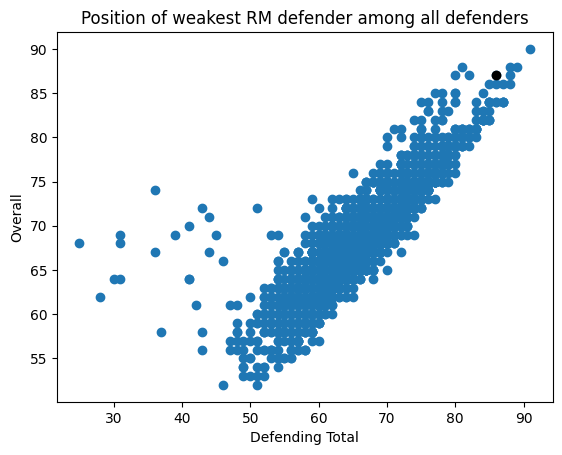

In [179]:

#Creating a variable which filter on a particulal weakest defender  from Real Madrid:
def_real_madrid = def_df_all[def_df_all["Full Name"] == 'Antonio Rüdiger'].index
def_real_madrid

#Build a scatter plot:
plt.scatter(def_df_all["Defending Total"], def_df_all["Overall"])
plt.scatter(def_df_all["Defending Total"][def_real_madrid], def_df_all["Overall"][def_real_madrid] , c = 'black')
plt.xlabel('Defending Total')
plt.ylabel('Overall')
plt.title('Position of weakest RM defender among all defenders')
plt.show()

In [25]:
#Let's look closer who are defenders on the near with our:

defenders_filter = def_df_all[["Full Name", "Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot", 'Defending Total', 'Standing Tackle', 'Sliding Tackle', 'Interceptions',
'Positioning', 'LongPassing',"Position","nationality_encoded"]]

defenders_filtered = defenders_filter.loc[(defenders_filter["Defending Total"] >= 80) & (defenders_filter["Overall"] >= 80)]
pd.set_option('display.max_rows', defenders_filtered.shape[0]+1)

defenders_filtered.head()

NameError: name 'def_df_all' is not defined

In [181]:
#And also let's have a look among free players:

free_agent_df = free_agent_df[["Full Name",'Best Position_maped', "Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot", 'Defending Total', 'Standing Tackle', 'Sliding Tackle', 'Interceptions',
'Positioning', 'LongPassing',"Position"]]
display(free_agent_df[free_agent_df['Best Position_maped']== "Defender"])


,Full Name,Best Position_maped,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Defending Total,Standing Tackle,Sliding Tackle,Interceptions,Positioning,LongPassing,Position
831,Dejan Lovren,Defender,78,78,Croatia,Free agent,0,32,188,84,-,2020,Right,80,82,83,80,21,66,NaN
931,Jason Denayer,Defender,77,79,Belgium,Free agent,0,27,184,80,-,2018,Right,78,79,78,79,36,71,NaN
1038,César Montes,Defender,77,82,Mexico,Free agent,0,25,191,70,-,2015,Right,78,78,76,77,56,76,NaN
1401,Héctor Moreno,Defender,76,76,Mexico,Free agent,0,34,186,75,-,2021,Left,77,75,75,73,46,68,NaN
1657,Jesús Gallardo,Defender,75,75,Mexico,Free agent,0,27,176,73,-,2018,Left,69,70,67,65,72,66,NaN
1901,Jesús Gallardo,Defender,75,75,Mexico,Free agent,0,27,176,73,-,2018,Left,69,70,67,65,72,66,NaN
2107,Jakub Brabec,Defender,74,74,Czech Republic,Free agent,0,29,186,77,-,2021,Right,73,75,74,73,52,70,NaN
2255,Joakim Nilsson,Defender,74,74,Sweden,Free agent,0,28,185,78,-,2022,Left,75,78,66,72,31,65,NaN
2952,Filip Helander,Defender,72,72,Sweden,Free agent,0,29,192,84,-,2019,Left,75,74,72,73,24,48,NaN
3103,Trent Sainsbury,Defender,72,72,Australia,Free agent,0,30,183,76,-,2022,Right,74,70,71,75,52,67,NaN


Part about prediction and correaltion:

In [183]:
numeric = def_df_all[["Overall","Potential","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Preferred Foot","Defending Total","Standing Tackle","Sliding Tackle","Interceptions","Positioning","LongPassing"]]

In [269]:
# #Get heat map on correlation:


# plt.matshow(corr)
# plt.xticks(range(0,13), numeric.columns, rotation = 90)
# plt.yticks(range(0,13), numeric.columns)
# plt.colorbar()
# plt.show()

In [186]:
# numeric2 = def_df_all[["Value(in Euro)","Age","Defending Total","Standing Tackle","Interceptions"]]

In [270]:

# corr2 = numeric2.corr()
# plt.matshow(corr2)
# plt.xticks(range(0,5), numeric2.columns, rotation = 90)
# plt.yticks(range(0,5), numeric2.columns)
# plt.colorbar()
# plt.show()

PART Goalkeepers:

In [189]:
#Creating df where are only Goalkeepers from the whole dataset:
gk_df = df[df['Position'] == "Goalkeeper"]
gk_df.head()

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded,Attacking_Work_Rate_num,Defensive_Work_Rate_num
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,2018,2,3,1,4,Belgium,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90,Goalkeeper,Goalkeeper,3,2,2
7,Manuel Neuer,90,90,13500000,GK,GK,Germany,36,193,93,1535,501,FC Bayern München,72000,22300000,GK,2024,2011,1,4,1,5,Germany,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90,Goalkeeper,Goalkeeper,5,2,2
14,Jan Oblak,89,91,85500000,GK,GK,Slovenia,29,188,87,1402,479,Atlético de Madrid,100000,181700000,GK,2023,2014,1,3,1,5,-,Medium,Medium,86,90,78,89,49,87,13,11,15,43,13,12,13,14,40,30,43,58,65,87,49,59,77,41,78,12,34,21,11,65,11,68,27,12,18,86,90,78,87,89,36,32,34,34,34,32,41,37,41,37,35,40,35,35,36,35,90,Goalkeeper,Goalkeeper,11,2,2
16,Ederson Santana de Moraes,89,91,88000000,GK,GK,Brazil,28,188,86,1583,502,Manchester City,210000,169400000,GK,2026,2017,2,3,1,3,-,Medium,Medium,87,82,93,88,64,88,20,14,14,61,18,23,15,20,66,40,64,63,60,88,48,70,66,41,78,18,38,27,20,70,51,70,29,15,8,87,82,93,88,88,43,41,43,43,43,41,50,47,52,47,40,47,40,39,38,39,90,Goalkeeper,Goalkeeper,9,2,2
18,Alisson Ramses Becker,89,90,79000000,GK,GK,Brazil,29,191,91,1437,489,Liverpool,190000,152100000,GK,2027,2018,1,3,1,3,-,Medium,Medium,86,85,85,89,54,90,17,13,29,60,20,27,19,18,58,40,58,49,40,87,37,64,52,32,78,14,27,11,13,66,23,68,15,19,16,86,85,85,90,89,42,38,41,41,41,38,48,45,49,45,36,42,36,35,35,35,90,Goalkeeper,Goalkeeper,9,2,2


In [190]:
gk_madrid_df =madrid_club[madrid_club['Position'] == "Goalkeeper"]
gk_madrid_df

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
6,Thibaut Courtois,90,91,90000000,GK,GK,30,199,96,1334,473,Real Madrid CF,250000,191300000,2026,2018,Left,3,1,4,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90,Goalkeeper,Goalkeeper


In [191]:
gk_features = madrid_club_df[['Goalkeeper Diving', 'Goalkeeper Handling',' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes' , 'Jumping']].columns

In [192]:
#Creating an array for gks:
player_values = gk_madrid_df[['Full Name','Goalkeeper Diving', 'Goalkeeper Handling',' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes' , 'Jumping']].values
print(player_values)

[['Thibaut Courtois' 84 89 75 89 90 68]]


In [193]:
#Create variable with categories:
categories_gk=['Goalkeeper Diving', 'Goalkeeper Handling',' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes' , 'Jumping']

In [194]:
#Plotting a radar with multiple players:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=player_values[0, 1:],
      theta=categories_gk,
      fill='toself',
      name=player_values[0, 0]
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[40, 95] #We can play with range for changing visibility
    )),
  showlegend=True,
  title = 'Goalkeeper',
  height=800,
  width=800,
)

fig.show()

Index([6], dtype='int64')


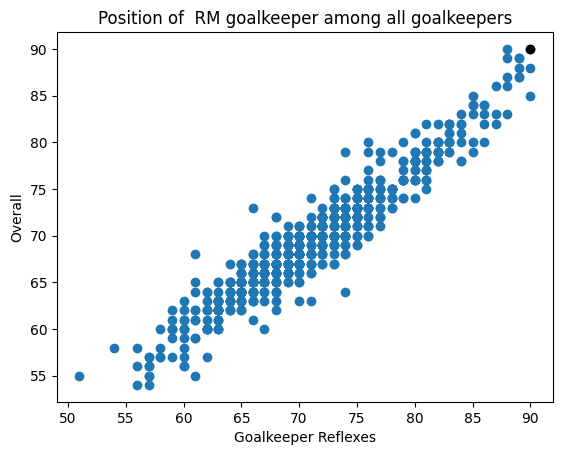

In [195]:
#Creating a variable which filter on a particulal goalkeeper from Real Madrid:
gk_real_madrid = gk_df[gk_df["Full Name"] == 'Thibaut Courtois'].index  # check here!!!!
print(gk_real_madrid)

#Build a scatter plot:
plt.scatter(gk_df["Goalkeeper Reflexes"], gk_df["Overall"] ) # check here!!!!
plt.scatter(gk_df["Goalkeeper Reflexes"][gk_real_madrid], gk_df["Overall"][gk_real_madrid] , c = 'black')
plt.xlabel('Goalkeeper Reflexes')  # check here!!!!
plt.ylabel('Overall')
plt.title('Position of  RM goalkeeper among all goalkeepers') # check here!!!!
plt.show()

In [196]:
#Let's look closer who are gks on the near with our:

gks_filter = gk_df[["Full Name", "Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot", 'Goalkeeper Diving', 'Goalkeeper Handling',' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes' , 'Jumping',"Position","nationality_encoded"]]

gks_filtered = gks_filter.loc[(gks_filter["Goalkeeper Reflexes"] >= 85) & (gks_filter["Overall"] >= 85)]
pd.set_option('display.max_rows', gks_filtered.shape[0]+1)

gks_filtered

,Full Name,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,Jumping,Position,nationality_encoded
6,Thibaut Courtois,90,91,Belgium,Real Madrid CF,90000000,30,199,96,2026,2018,2,84,89,75,89,90,68,Goalkeeper,3
7,Manuel Neuer,90,90,Germany,FC Bayern München,13500000,36,193,93,2024,2011,1,87,88,91,91,88,77,Goalkeeper,5
14,Jan Oblak,89,91,Slovenia,Atlético de Madrid,85500000,29,188,87,2023,2014,1,86,90,78,87,89,77,Goalkeeper,11
16,Ederson Santana de Moraes,89,91,Brazil,Manchester City,88000000,28,188,86,2026,2017,2,87,82,93,88,88,66,Goalkeeper,9
18,Alisson Ramses Becker,89,90,Brazil,Liverpool,79000000,29,191,91,2027,2018,1,86,85,85,90,89,52,Goalkeeper,9
22,Gianluigi Donnarumma,88,92,Italy,Paris Saint-Germain,103500000,23,196,90,2026,2021,1,90,83,79,85,89,72,Goalkeeper,14
27,Marc-André ter Stegen,88,89,Germany,FC Barcelona,68500000,30,187,85,2025,2014,1,86,85,87,85,90,79,Goalkeeper,5
33,Hugo Lloris,87,87,France,Tottenham Hotspur,9000000,35,188,82,2024,2012,2,88,83,74,84,88,74,Goalkeeper,1
35,David De Gea Quintana,87,87,Spain,Manchester United,42000000,31,192,76,2023,2011,1,88,80,76,84,89,67,Goalkeeper,17
37,Mike Maignan,87,90,France,AC Milan,80000000,26,191,89,2026,2021,1,85,82,85,85,89,74,Goalkeeper,1


In [198]:
#And also let's have a look among free players:

free_agent_gks = df[(df["Position"].isna())&(df['Best Position_maped'] == "Goalkeeper")]

free_agent_gks = free_agent_gks[["Full Name", "Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot", 'Goalkeeper Diving', 'Goalkeeper Handling',' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes' , 'Jumping',"Position","nationality_encoded"]]

display(free_agent_gks)



,Full Name,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,Jumping,Position,nationality_encoded
438,Tomáš Vaclík,80,80,Czech Republic,Free agent,0,33,188,85,-,2021,1,78,75,74,82,83,72,NaN,24
447,Guillermo Ochoa,80,80,Mexico,Free agent,0,36,185,78,-,2019,1,82,73,70,81,84,79,NaN,40
548,Alfredo Talavera,79,79,Mexico,Free agent,0,39,186,85,-,2020,1,80,82,68,78,80,77,NaN,40
865,Milan Borjan,77,77,Canada,Free agent,0,34,196,84,-,2020,1,78,74,75,74,78,68,NaN,35
1232,Florin Niță,76,76,Romania,Free agent,0,34,184,78,-,2018,1,76,76,69,77,78,61,NaN,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,Yousef Hassan,65,68,Qatar,Free agent,0,26,186,78,-,2022,1,64,62,59,66,65,50,NaN,78
9901,Meshaal Barsham,65,71,Qatar,Free agent,0,24,178,72,-,2022,1,65,60,54,65,69,74,NaN,78
10151,Péter Szappanos,65,65,Hungary,Free agent,0,31,194,93,-,2021,1,62,63,60,58,74,38,NaN,25
16424,Stefanos Kittos,58,68,Cyprus,Free agent,0,20,186,75,-,2021,1,62,59,55,54,60,52,NaN,106


PART FORWARD:

In [200]:
#Creating df for radar chart:
forward_df= madrid_club_df[madrid_club_df["Position"] == 'Forward']

forward_df

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,Right,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward
63,Vinícius José de Oliveira Júnior,86,92,109000000,LW,LW,Brazil,21,176,73,1985,434,Real Madrid CF,200000,245300000,LW,2025,2018,Right,4,5,2,-,High,Medium,95,79,74,90,29,67,72,84,50,75,72,92,77,62,73,89,95,95,94,82,83,76,75,84,62,76,58,26,82,75,65,79,32,25,18,5,7,7,7,10,81,85,84,84,84,85,85,86,77,86,63,58,63,58,47,58,17,Forward,Forward
297,Rodrygo Silva de Goes,81,88,52500000,"RW,LW",RM,Brazil,21,174,64,1950,410,Real Madrid CF,130000,118100000,RW,2028,2019,Right,4,4,1,-,Medium,Medium,88,76,74,84,32,56,74,80,62,77,67,84,80,73,64,83,88,88,87,78,85,73,74,81,42,74,54,21,79,73,74,82,25,36,32,9,8,12,8,5,78,81,80,80,80,81,81,82,74,82,62,56,62,59,47,59,17,Forward,Midfielder


In [214]:
forward_features = madrid_club_df[[ 'Sprint Speed', 'Shot Power', 'Shooting Total' ,'Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration']].columns

In [217]:
#Creating an array for forward players:
player_values = forward_df[['Full Name','Sprint Speed', 'Shot Power', 'Shooting Total' ,'Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration']].values
print(player_values)

[['Karim Benzema' 80 87 88 92 90 89 88 79]
 ['Vinícius José de Oliveira Júnior' 95 76 79 84 50 75 72 95]
 ['Rodrygo Silva de Goes' 88 73 76 80 62 77 67 88]]


In [218]:
#Create variable with categories:
categories_forward=['Sprint Speed', 'Shot Power', 'Shooting Total' ,'Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration']

In [219]:
#Plotting a radar with multiple players:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=player_values[0, 1:],
      theta=categories_forward,
      fill='toself',
      name=player_values[0, 0]
))
fig.add_trace(go.Scatterpolar(
      r=player_values[1, 1:],
      theta=categories_forward,
      fill='toself',
      name=player_values[1, 0]
))

fig.add_trace(go.Scatterpolar(
      r=player_values[2, 1:],
      theta=categories_forward,
      fill='toself',
      name=player_values[2, 0]
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100] #We can play with range for changing visibility
    )),
  showlegend=True,
  title = 'Forward',
  height=800,
  width=800,
)

fig.show()

In [271]:
#Let's find defender with lowest score of defender characteristics:

forward_df["sum_forward_feat"] =forward_df[['Full Name','Sprint Speed', 'Shot Power', 'Shooting Total' ,'Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration']].apply(lambda row: row['Sprint Speed'] + row['Shot Power'] +row['Shooting Total'] + row['Finishing']+ row['Heading Accuracy']+ row['Short Passing']+ row['Volleys']+ row['Acceleration'], axis=1)

forward_df[["Full Name","Age","Overall","Potential", "sum_forward_feat"]]

C:\Users\Yuliya Lavrenyuk\AppData\Local\Temp\ipykernel_10572\1041207173.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Full Name,Age,sum_forward_feat
1,Karim Benzema,34,693
63,Vinícius José de Oliveira Júnior,21,626
297,Rodrygo Silva de Goes,21,611


In [228]:
#Creating DF only with forwardss based on all forwards:
forward_df_all = df[df['Position'] == "Forward"]
forward_df_all

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded,Attacking_Work_Rate_num,Defensive_Work_Rate_num
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,2021,2,4,4,5,Argentina,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,Forward,Midfielder,0,1,1
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,1,4,4,4,France,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,Forward,Forward,1,2,2
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,2022,1,4,4,5,Poland,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,Forward,Forward,2,3,2
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,2018,1,4,5,4,France,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,Forward,Forward,1,3,1
5,Mohamed Salah,90,90,115500000,RW,RW,Egypt,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,2017,2,3,4,4,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25,Forward,Forward,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,Matthew Anim Cudjoe,55,71,325000,"CAM,RW",RM,Ghana,18,168,56,1438,305,Dundee United,500,772000,RW,2024,2021,1,3,2,1,-,Medium,Medium,74,49,54,61,30,37,57,51,23,55,44,59,58,44,56,60,75,74,76,43,92,55,62,48,27,45,40,24,44,48,32,49,33,31,33,5,10,13,11,10,51,57,54,54,54,57,57,58,52,58,48,44,48,46,37,46,15,Forward,Midfielder,28,2,2
17671,Ethon Varian,54,63,240000,ST,ST,Republic of Ireland,20,183,80,1343,287,Bohemian FC,500,420000,ST,2023,2022,1,2,2,1,-,High,Medium,59,53,45,55,20,55,41,52,48,50,49,52,39,31,40,59,60,59,59,52,58,54,68,57,64,51,29,17,54,48,63,48,17,17,12,7,12,9,6,9,56,53,54,54,54,53,55,54,49,54,40,38,40,38,35,38,15,Forward,Forward,74,3,2
18066,Carlos Gavilán,52,69,200000,"CAM,ST",ST,Paraguay,18,181,64,1459,305,General Caballero (JLM),500,555000,ST,2023,2022,1,2,2,1,-,Medium,Medium,65,50,50,49,36,55,43,50,60,59,38,48,35,35,54,43,63,67,58,53,70,57,64,59,5

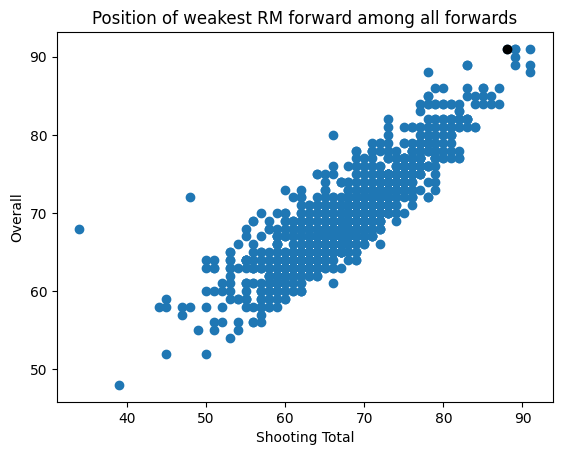

In [272]:
#Creating a variable which filter on a particulal weakest forward  from Real Madrid:
forward_real_madrid = forward_df_all[forward_df_all["Full Name"] == 'Karim Benzema'].index
forward_real_madrid

#Build a scatter plot:
plt.scatter(forward_df_all["Shooting Total"], forward_df_all["Overall"])
plt.scatter(forward_df_all["Shooting Total"][forward_real_madrid], forward_df_all["Overall"][forward_real_madrid] , c = 'black')
plt.xlabel('Shooting Total')
plt.ylabel('Overall')
plt.title('Position of weakest RM forward among all forwards')
plt.show()


In [231]:
#Let's look closer who are defenders on the near with our:

forwards_filter = forward_df_all[['Full Name',"Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot",'Sprint Speed', 'Shot Power', 'Shooting Total' ,'Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration',"Position","nationality_encoded"]]

forwards_filtered = forwards_filter.loc[(forwards_filter["Shooting Total"] >= 75) & (forward_df_all["Overall"] >= 80)]
pd.set_option('display.max_rows', defenders_filtered.shape[0]+1)

forwards_filtered

,Full Name,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Sprint Speed,Shot Power,Shooting Total,Finishing,Heading Accuracy,Short Passing,Volleys,Acceleration,Position,nationality_encoded
0,Lionel Messi,91,91,Argentina,Paris Saint-Germain,54000000,35,169,67,2023,2021,2,76,86,89,90,70,91,88,87,Forward,0
1,Karim Benzema,91,91,France,Real Madrid CF,64000000,34,185,81,2023,2009,1,80,87,88,92,90,89,88,79,Forward,1
2,Robert Lewandowski,91,91,Poland,FC Barcelona,84000000,33,185,81,2025,2022,1,75,91,91,94,91,84,89,76,Forward,2
4,Kylian Mbappé,91,95,France,Paris Saint-Germain,190500000,23,182,73,2024,2018,1,97,88,89,93,72,85,83,97,Forward,1
5,Mohamed Salah,90,90,Egypt,Liverpool,115500000,30,175,71,2023,2017,2,91,83,89,93,59,84,84,89,Forward,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Andy Delort,80,80,Algeria,OGC Nice,20500000,30,181,83,2024,2021,1,84,89,81,81,82,74,82,79,Forward,20
455,José Luis Sanmartín Mato,80,80,Spain,RCD Espanyol de Barcelona,17000000,32,192,80,2025,2022,1,61,83,81,83,90,78,75,65,Forward,17
474,Dominic Calvert-Lewin,80,84,England,Everton,29500000,25,187,71,2025,2016,1,87,79,77,81,89,71,72,73,Forward,8
481,Steven Bergwijn,80,85,Netherlands,Ajax,32000000,24,178,78,2027,2022,1,85,84,78,76,60,79,76,87,Forward,7


In [232]:
#And also let's have a look among free players:

free_agent_forwards = df[(df["Position"].isna())&(df['Best Position_maped'] == "Forward")]

free_agent_forwards = free_agent_forwards[['Full Name',"Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot",'Sprint Speed', 'Shot Power', 'Shooting Total' ,'Finishing','Heading Accuracy', 'Short Passing','Volleys', 'Acceleration',"Position","nationality_encoded"]]

display(free_agent_forwards)


,Full Name,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Sprint Speed,Shot Power,Shooting Total,Finishing,Heading Accuracy,Short Passing,Volleys,Acceleration,Position,nationality_encoded
1188,Henry Martín,76,76,Mexico,Free agent,0,29,177,83,-,2018,1,78,79,74,77,78,70,65,76,NaN,40
1541,André Ayew,75,75,Ghana,Free agent,0,32,176,72,-,2021,2,68,77,76,76,75,74,69,71,NaN,28
3248,Hassan Al Haydos,72,72,Qatar,Free agent,0,31,170,66,-,2022,1,76,63,65,66,45,71,51,83,NaN,78
3300,Almoez Ali,72,75,Qatar,Free agent,0,25,184,69,-,2022,1,82,77,74,76,76,58,74,68,NaN,78
3304,Florin Tănase,72,72,Romania,Free agent,0,27,185,71,-,2022,1,73,71,72,74,58,73,64,76,NaN,64
4522,Artem Dovbyk,70,75,Ukraine,Free agent,0,25,185,78,-,2020,2,74,73,67,69,74,67,57,73,NaN,41
5599,Ali Asad,69,69,Qatar,Free agent,0,29,175,61,-,2022,2,65,61,64,67,43,69,70,73,NaN,78
5831,Joel Fameyeh,69,74,Ghana,Free agent,0,25,180,73,-,2022,1,83,69,68,71,68,64,60,81,NaN,28
7864,Mitchell Duke,67,67,Australia,Free agent,0,31,182,84,-,2021,1,80,75,67,67,58,65,51,78,NaN,72
8312,Mohammed Muntari,67,67,Qatar,Free agent,0,28,194,77,-,2022,1,72,67,67,69,73,57,62,51,NaN,78


PART MIDFIELDERS:

In [233]:
#Creating df for radar chart:
midfielder_df= madrid_club_df[madrid_club_df["Position"] == 'Midfielder']

midfielder_df

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded,Attacking_Work_Rate_num,Defensive_Work_Rate_num
28,Toni Kroos,88,88,72000000,CM,CM,Germany,32,183,76,2147,444,Real Madrid CF,310000,147600000,CM,2023,2014,1,5,3,4,-,Medium,Medium,53,81,90,81,71,68,88,77,58,93,82,80,86,84,93,88,55,52,63,90,71,89,32,75,72,86,60,80,76,89,73,88,71,73,60,10,11,13,7,10,80,80,81,81,81,80,86,84,88,84,80,84,80,77,74,77,22,Midfielder,Midfielder,5,2,2
29,Luka Modrić,88,88,29000000,CM,CM,Croatia,36,172,66,2257,464,Real Madrid CF,230000,59500000,CM,2023,2012,1,4,4,4,Croatia,Medium,Medium,73,76,89,88,72,66,86,72,55,91,76,85,85,78,92,90,76,70,91,88,92,79,67,83,58,82,62,80,78,90,82,92,70,75,72,13,9,7,14,9,79,83,82,82,82,83,88,87,88,87,84,84,84,82,75,82,22,Midfielder,Midfielder,16,2,2
231,Aurélien Tchouaméni,82,89,61500000,"CM,CDM",CDM,France,22,187,81,2142,460,Real Madrid CF,145000,138400000,CDM,2028,2022,1,3,3,2,France,Medium,High,70,70,79,78,81,82,68,67,74,85,50,78,76,53,84,80,68,71,73,83,70,78,74,84,82,75,82,85,75,82,55,83,81,83,78,9,8,12,12,7,77,76,77,77,77,76,81,79,84,79,81,85,81,81,83,81,19,Midfielder,Midfielder,1,2,3


In [234]:
mid_features = madrid_club_df[['Short Passing', 'Dribbling', 'Interceptions', 'Positioning']].columns

In [235]:
#Creating an array for midfielderss:
player_values = midfielder_df[['Full Name','Short Passing', 'Dribbling', 'Interceptions', 'Positioning']].values
print(player_values)

[['Toni Kroos' 93 80 80 76]
 ['Luka Modrić' 91 85 80 78]
 ['Aurélien Tchouaméni' 85 78 85 75]]


In [236]:
#Create variable with categories:
categories=['Short Passing', 'Dribbling', 'Interceptions', 'Positioning']

In [238]:
#Plotting a radar with multiple players:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=player_values[0, 1:],
      theta=categories,
      fill='toself',
      name=player_values[0, 0]
))
fig.add_trace(go.Scatterpolar(
      r=player_values[1, 1:],
      theta=categories,
      fill='toself',
      name=player_values[1, 0]
))
fig.add_trace(go.Scatterpolar(
      r=player_values[2, 1:],
      theta=categories,
      fill='toself',
      name=player_values[2, 0]
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[40, 100] #We can play with range for changing visibility
    )),
  showlegend=True,
  title = 'Midfielder',
  height=800,
  width=800,
)

fig.show()

In [274]:
#Let's find defender with lowest score of dmidfielder characteristics:

midfielder_df["sum_mid_feat"] =midfielder_df[['Full Name','Short Passing', 'Dribbling', 'Interceptions', 'Positioning']].apply(lambda row: row['Short Passing'] + row['Dribbling'] +row['Interceptions'] + row['Positioning'], axis=1)

midfielder_df[["Full Name","Age","Overall","Potential","sum_mid_feat"]]

C:\Users\Yuliya Lavrenyuk\AppData\Local\Temp\ipykernel_10572\4073599625.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Full Name,Age,Overall,Potential,sum_mid_feat
28,Toni Kroos,32,88,88,329
29,Luka Modrić,36,88,88,334
231,Aurélien Tchouaméni,22,82,89,323


In [244]:
#Creating DF only with midfielderss based on all defenders:
midfilelder_df_all = df[df['Position'] == "Midfielder"]
midfilelder_df_all

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded,Attacking_Work_Rate_num,Defensive_Work_Rate_num
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,2015,1,5,4,4,Belgium,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,Midfielder,Midfielder,3,3,3
17,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,27,177,75,2283,473,FC Bayern München,130000,182000000,CDM,2025,2015,1,4,3,4,Germany,High,Medium,68,72,87,84,83,79,91,68,72,87,69,82,85,69,90,85,77,60,84,88,84,78,79,94,68,83,89,84,80,85,44,85,85,85,78,8,15,7,15,15,80,81,80,80,80,81,85,86,89,86,87,89,87,86,84,86,24,Midfielder,Midfielder,5,3,2
19,N'Golo Kanté,89,89,72000000,"CDM,CM",CDM,France,31,168,70,2154,462,Chelsea,220000,133199999,CM,2023,2016,1,3,2,4,France,Medium,High,72,66,74,81,87,82,68,65,54,82,56,78,49,49,76,81,77,68,78,93,92,71,75,95,72,65,93,91,72,77,54,84,90,93,86,15,12,10,7,10,75,76,76,76,76,76,80,81,84,81,87,89,87,87,87,87,23,Midfielder,Midfielder,1,2,3
28,Toni Kroos,88,88,72000000,CM,CM,Germany,32,183,76,2147,444,Real Madrid CF,310000,147600000,CM,2023,2014,1,5,3,4,-,Medium,Medium,53,81,90,81,71,68,88,77,58,93,82,80,86,84,93,88,55,52,63,90,71,89,32,75,72,86,60,80,76,89,73,88,71,73,60,10,11,13,7,10,80,80,81,81,81,80,86,84,88,84,80,84,80,77,74,77,22,Midfielder,Midfielder,5,2,2
29,Luka Modrić,88,88,29000000,CM,CM,Croatia,36,172,66,2257,464,Real Madrid CF,230000,59500000,CM,2023,2012,1,4,4,4,Croatia,Medium,Medium,73,76,89,88,72,66,86,72,55,91,76,85,85,78,92,90,76,70,91,88,92,79,67,83,58,82,62,80,78,90,82,92,70,75,72,13,9,7,14,9,79,83,82,82,82,83,88,87,88,87,84,84,84,82,75,82,22,Midfielder,Midfielder,16,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17788,Wahengbam Angousana,53,55,120000,CM,CM,India,26,170,63,1397,299,SC East Bengal FC,500,171000,CM,2022,2020,1,2,2,1,-,Medium,Medium,57,37,49,53,47,56,40,37,43,55,34,50,37,30,52,54,56,58,64,50,71,38,56,85,43,39,53,53,41,52,29,45,45,46,45,8,8,6,13,6,47,49,48,48,48,49,52,53,55,53,55,55,55,54,50,54,15,Midfielder,Midfielder,143,2,2
17929,Christian Witzig,53,67,230000,CM,CAM,Switzerland,21,178,69,1517,317,FC St. Gallen 1879,1000,477000,CM,2023,2021,1,2,2,1,-,Medium,Medium,66,42,49,56,49,55,40,33,53,57,38,50,41,38,54,61,68,64,66,51,71,55,63,62,47,48,62,44,54,43,46,49,48,51,53,9,14,10,12,11,53,52,52,52,52,52,55,55,55,55,55,55,55,55,54,55,18,Midfielder,Midfielder,26,2,2
17949,Daogang Yao,53,59,140000,"CDM,CM",CB,China PR,24,180,65,1299,279,Hebei FC,1000,245000,CDM,2025,2021,1,2,2,1,-,Medium,Medium,61,25,36,40,56,61,24,21,49,44,25,

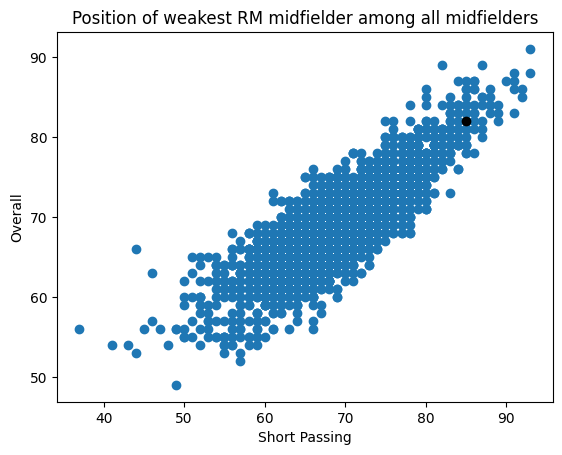

In [250]:

#Creating a variable which filter on a particulal weakest midfielder  from Real Madrid:
midfielder_real_madrid = midfilelder_df_all[midfilelder_df_all["Full Name"] == 'Aurélien Tchouaméni'].index
midfielder_real_madrid

#Build a scatter plot:
plt.scatter(midfilelder_df_all["Short Passing"], midfilelder_df_all["Overall"])
plt.scatter(midfilelder_df_all["Short Passing"][midfielder_real_madrid], midfilelder_df_all["Overall"][midfielder_real_madrid] , c = 'black')
plt.xlabel('Short Passing')
plt.ylabel('Overall')
plt.title('Position of weakest RM midfielder among all midfielders')
plt.show()

In [253]:
#Let's look closer who are midfielders on the near with our:

midfielders_filter = midfilelder_df_all[["Full Name", "Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot", 'Short Passing', 'Dribbling', 'Interceptions', 'Positioning',"Position","nationality_encoded"]]

midfielders_filtered = midfielders_filter.loc[(midfielders_filter["Short Passing"] >= 85) & (midfielders_filter["Overall"] >= 80)]
pd.set_option('display.max_rows', midfielders_filtered.shape[0]+1)


midfielders_filtered.head()

,Full Name,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Short Passing,Dribbling,Interceptions,Positioning,Position,nationality_encoded
3,Kevin De Bruyne,91,91,Belgium,Manchester City,107500000,31,181,70,2025,2015,1,93,88,66,88,Midfielder,3
17,Joshua Kimmich,89,90,Germany,FC Bayern München,105500000,27,177,75,2025,2015,1,87,82,84,80,Midfielder,5
28,Toni Kroos,88,88,Germany,Real Madrid CF,72000000,32,183,76,2023,2014,1,93,80,80,76,Midfielder,5
29,Luka Modrić,88,88,Croatia,Real Madrid CF,29000000,36,172,66,2023,2012,1,91,85,80,78,Midfielder,16
31,Rodrigo Hernández Cascante,87,89,Spain,Manchester City,88500000,26,191,82,2027,2019,1,86,78,83,75,Midfielder,17
34,Thomas Müller,87,87,Germany,FC Bayern München,63000000,32,185,76,2024,2008,1,85,77,58,96,Midfielder,5
36,Marco Verratti,87,87,Italy,Paris Saint-Germain,77500000,29,165,60,2024,2012,1,90,91,85,78,Midfielder,14
41,Leon Goretzka,87,88,Germany,FC Bayern München,91000000,27,189,82,2026,2018,1,86,84,86,85,Midfielder,5
42,Frenkie de Jong,87,92,Netherlands,FC Barcelona,116500000,25,180,74,2026,2019,1,91,87,82,77,Midfielder,7
43,Thiago Alcântara,86,86,Spain,Liverpool,55500000,31,174,70,2024,2020,1,91,89,82,75,Midfielder,17


In [254]:
#And also let's have a look among free players:

free_agent_mdf = free_agent_df[["Full Name",'Best Position_maped', "Overall","Potential","Nationality","Club Name","Value(in Euro)","Age","Height(in cm)","Weight(in kg)","Contract Until","Joined On","Preferred Foot", 'Defending Total', 'Standing Tackle', 'Sliding Tackle', 'Interceptions',
'Positioning', 'LongPassing',"Position"]]


display(free_agent_mdf[free_agent_mdf['Best Position_maped']== "Midfielder"])


,Full Name,Best Position_maped,Overall,Potential,Nationality,Club Name,Value(in Euro),Age,Height(in cm),Weight(in kg),Contract Until,Joined On,Preferred Foot,Defending Total,Standing Tackle,Sliding Tackle,Interceptions,Positioning,LongPassing,Position
896,Alexis Vega,Midfielder,77,83,Mexico,Free agent,0,24,173,77,-,2019,Right,32,19,18,26,75,74,NaN
1086,Akram Afif,Midfielder,76,78,Qatar,Free agent,0,25,177,70,-,2020,Right,32,36,28,27,73,70,NaN
1233,Carlos Rodríguez,Midfielder,76,81,Mexico,Free agent,0,25,171,64,-,2022,Right,66,70,62,70,72,75,NaN
1340,Luis Romo,Midfielder,76,77,Mexico,Free agent,0,27,182,84,-,2022,Right,72,74,68,73,72,84,NaN
1576,Uriel Antuna,Midfielder,75,77,Mexico,Free agent,0,24,174,59,-,2022,Right,31,31,32,35,77,58,NaN
1589,Eduard Atuesta,Midfielder,75,82,Colombia,Free agent,0,25,180,71,-,2017,Right,68,71,66,71,67,76,NaN
1638,Uriel Antuna,Midfielder,75,77,Mexico,Free agent,0,24,174,59,-,2022,Right,31,31,32,35,77,58,NaN
2543,Ryan Thomas,Midfielder,73,73,New Zealand,Free agent,0,27,174,64,-,2022,Right,61,58,59,72,69,73,NaN
3203,Alexandru Cicâldău,Midfielder,72,75,Romania,Free agent,0,24,178,76,-,2021,Right,62,67,60,65,70,75,NaN
3273,Loïc Négo,Midfielder,72,72,Hungary,Free agent,0,31,181,71,-,2015,Right,63,66,64,65,65,69,NaN


PART RESERVE and SUBSTITUTE:

<Axes: xlabel='Age', ylabel='Overall'>

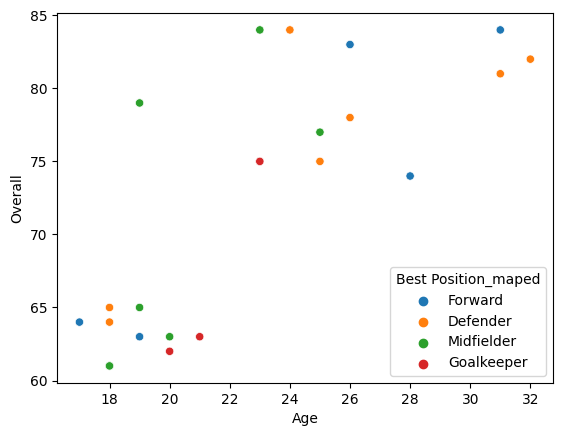

In [258]:
#Lets look closer on reserve:
sns.scatterplot(
    y=reserve_df["Overall"],
    x=reserve_df["Age"],
    hue=reserve_df["Best Position_maped"],
)



In [256]:
reserve_df= madrid_club_df[(madrid_club_df["Position"] == 'Reserve')|(madrid_club_df["Position"] == 'Substitute')]

reserve_df.head()

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Best Position_maped,nationality_encoded,Attacking_Work_Rate_num,Defensive_Work_Rate_num
119,Eden Hazard,84,84,35000000,LW,LW,Belgium,31,175,74,2045,430,Real Madrid CF,220000,71800000,SUB,2024,2019,1,4,4,4,Belgium,Medium,Medium,83,80,82,87,35,63,77,78,61,85,82,89,83,79,81,87,84,82,85,77,89,82,55,74,61,77,54,41,83,84,87,88,34,27,22,11,12,6,8,8,82,83,83,83,83,83,84,84,81,84,65,63,65,60,51,60,20,Substitute,Forward,3,2,2
133,Éder Gabriel Militão,84,89,57500000,CB,CB,Brazil,24,186,78,2043,445,Real Madrid CF,160000,122200000,SUB,2025,2019,1,3,2,2,-,Medium,Medium,86,50,70,72,85,82,69,48,82,79,34,70,60,40,76,74,83,88,70,85,62,62,85,86,79,42,84,86,64,59,60,74,85,86,84,11,8,15,12,15,70,70,69,69,69,70,71,75,75,75,83,83,83,85,86,85,22,Substitute,Defender,9,2,2
134,Federico Valverde,84,90,66000000,"CM,RW",CM,Uruguay,23,182,78,2192,478,Real Madrid CF,175000,148500000,SUB,2027,2016,1,4,3,1,-,High,High,87,74,80,79,78,80,70,69,59,86,70,78,70,66,85,83,82,91,76,84,68,83,62,86,79,81,81,81,78,81,59,82,79,81,79,6,10,6,15,8,79,80,80,80,80,80,83,83,85,83,83,84,83,83,80,83,20,Substitute,Midfielder,27,3,3
156,Marco Asensio Willemsen,83,84,43000000,RW,RW,Spain,26,182,76,2036,431,Real Madrid CF,200000,91400000,SUB,2023,2015,2,3,4,3,-,High,Medium,82,80,81,83,43,62,81,78,57,81,79,83,84,76,82,87,83,81,80,78,76,86,58,75,63,85,45,45,80,80,62,82,40,42,39,13,9,6,12,10,81,82,81,81,81,82,84,84,81,84,69,66,69,65,55,65,21,Substitute,Forward,17,3,2
269,José Ignacio Fernández Iglesias,82,82,20000000,"CB,LB",CB,Spain,32,180,76,1892,413,Real Madrid CF,155000,41000000,SUB,2023,2010,1,4,2,2,-,Low,High,75,37,69,70,82,80,70,32,79,84,38,64,55,37,67,77,69,79,65,80,75,54,84,80,79,28,80,83,37,53,45,75,83,83,81,12,7,10,15,7,61,63,61,61,61,63,65,69,71,69,81,81,81,82,82,82,20,Substitute,Defender,17,1,3
350,Lucas Vázquez Iglesias,81,81,18500000,"RB,RW",RB,Spain,31,173,70,2152,456,Real Madrid CF,140000,37900000,SUB,2024,2015,1,4,4,2,-,High,Medium,82,73,79,80,73,69,83,72,58,79,58,81,83,71,76,79,81,82,81,81,82,80,69,91,56,76,72,75,80,79,56,75,74,74,73,9,16,9,9,7,77,79,79,79,79,79,81,81,81,81,81,78,81,80,73,80,20,Substitute,Defender,17,3,2
541,Eduardo Camavinga,79,89,38000000,"CM,CDM",CDM,France,19,182,68,2125,455,Real Madrid CF,78000,85500000,SUB,2027,2021,2,3,4,3,-,High,High,76,66,78,81,76,78,70,62,64,84,59,80,72,59,81,83,75,76,81,79,78,73,70,81,78,69,78,77,73,77,62,82,75,80,79,12,6,8,12,12,76,76,76,76,76,76,81,80,82,80,81,83,81,81,80,81,21,Substitute,Midfielder,1,3,3
825,Álvaro Odriozola Arzalluz,78,80,16000000,RB,RWB,Spain,26,176,66,1989,422,Real Madrid CF,115000,34000000,SUB,2024,2018,1,3,3,1,-,High,High,82,55,71,75,74,65,80,48,73,75,48,76,71,47,70,76,79,85,75,73,78,61,71,79,58,59,62,73,69,63,62,67,73,76,77,11,12,10,5,14,69,72,70,70,70,72,72,76,73,76,79,75,79,78,74,78,19,Substitute,Defender,17,3,3
941,Daniel Ceballos Fernández,77,80,14000000,"CM,CDM",CM,Spain,25,179,68,2007,417,Real Madrid CF,110000,29800000,SUB,2023,2017,1,3,4,2,-,Medium,Medium,58,68,77,82,66,66,7

In [240]:
reserve_df['Best Position_maped'].value_counts()

Best Position_maped
Defender      7
Midfielder    7
Forward       5
Goalkeeper    4
Name: count, dtype: int64